In [1]:
import xml.etree.ElementTree as ET
import re
import os
import pandas as pd
import seaborn as sns

In [106]:
tree = ET.parse("./logs/Check_output/run_1/tripinfo.xml")
root = tree.getroot()

In [107]:
df = {"veh_id" : [],
      "depart" : [],
      "duration" : [],
      "arrival" : [],
      "emissions" : []}


for veh in root:
    df["veh_id"].append(veh.get("id"))
    df["depart"].append(float(veh.get("depart")))
    df["duration"].append(float(veh.get("duration")))
    df["arrival"].append(float(veh.get("arrival")))

In [108]:
bins = np.arange(start = 0, stop = data.arrival.max(), step = 30)
data["interval"] = pd.cut(data.depart, bins= bins, labels = range(len(bins)-1))

In [110]:
data.groupby(data.interval)[["duration","arrival"]].agg({'duration': np.sum,'arrival': np.mean})

duration      arrival
interval                       
0            635.0   107.428571
1           1003.0   145.000000
2            813.0   177.375000
3            353.0   194.000000
4            511.0   226.333333
5            622.0   251.571429
6            497.0   294.000000
7            739.0   315.000000
8           1045.0   357.100000
9           1519.0   426.909091
10           495.0   438.250000
11          1054.0   521.500000
12           225.0   500.500000
13          1061.0   580.333333
14          1325.0   599.000000
15          1047.0   638.000000
16          1451.0   654.666667
17          1101.0   659.000000
18          1425.0   673.500000
19           585.0   698.800000
20           751.0   737.166667
21           906.0   757.000000
22           847.0   782.250000
23           452.0   796.400000
24           671.0   818.375000
25          1179.0   862.500000
26           679.0   893.428571
27           620.0   925.833333
28           923.0   960.000000
29          1038.0   980.090909
...            ...          ...
94           986.0  2956.750000
95           461.0  2976.500000
96           801.0  2996.250000
97           287.0  3027.666667
98           191.0  3062.500000
99           425.0  3073.800000
100         1117.0  3137.777778
101          645.0  3173.200000
102          673.0  3188.500000
103         1398.0  3204.428571
104          519.0  3225.666667
105          705.0  3256.125000
106          510.0  3284.000000
107          863.0  3318.666667
108          638.0  3347.285714
109          486.0  3381.400000
110          858.0  3407.777778
111          738.0  3453.714286
112          955.0  3480.888889
113          379.0  3506.000000
114          381.0  3517.000000
115          414.0  3544.600000
116          404.0  3572.800000
117          994.0  3624.100000
118         1154.0  3672.000000
119         1160.0  3714.222222
120            0.0          NaN
121            0.0          NaN
122            0.0          NaN
123            0.0          NaN

[124 rows x 2 columns]

In [70]:
data = pd.DataFrame(df)

In [94]:
len(bins)

375

In [89]:
data

veh_id  depart  duration  arrival interval
0      WE_2    11.0      76.0     87.0        0
1      WE_3    17.0      74.0     91.0        0
2      EW_0     8.0      88.0     96.0        0
3      EW_1    13.0      84.0     97.0        0
4      WE_4    22.0     104.0    126.0        1
5      EW_6    18.0     108.0    126.0        0
6     SN_16    52.0      74.0    126.0        2
7      EW_8    31.0      97.0    128.0        1
8      WE_5    28.0     101.0    129.0        1
9      WE_7    33.0     113.0    146.0        1
10     EW_9    36.0     110.0    146.0        1
11    EW_10    42.0     106.0    148.0        2
12    WE_11    44.0     105.0    149.0        2
13    EW_12    47.0     103.0    150.0        2
14    WE_17    53.0      98.0    151.0        2
15    EW_13    52.0     100.0    152.0        2
16    EW_14    57.0      97.0    154.0        2
17    EW_15    62.0      93.0    155.0        3
18    SN_18    67.0      99.0    166.0        3
19    SN_22    82.0      86.0    168.0        4
20    EW_19    69.0     108.0    177.0        3
21    WE_23    86.0      92.0    178.0        4
22    EW_20    74.0     105.0    179.0        3
23    WE_25    94.0      86.0    180.0        4
24    WE_26   102.0      94.0    196.0        5
25    EW_21    79.0     118.0    197.0        3
26    EW_24    87.0     112.0    199.0        4
27    WE_27   107.0      92.0    199.0        5
28    EW_28   120.0      81.0    201.0        5
29    EW_29   125.0      77.0    202.0        6
..      ...     ...       ...      ...      ...
849  EW_849  3508.0      74.0   3582.0      175
850  EW_850  3514.0      73.0   3587.0      175
851  WE_851  3513.0      75.0   3588.0      175
852  WE_852  3518.0      98.0   3616.0      175
853  EW_853  3519.0      98.0   3617.0      175
854  WE_854  3523.0      95.0   3618.0      176
855  EW_855  3524.0      95.0   3619.0      176
856  SN_862  3551.0      73.0   3624.0      177
857  WE_856  3528.0     119.0   3647.0      176
858  EW_859  3537.0     111.0   3648.0      176
859  WE_857  3533.0     116.0   3649.0      176
860  EW_863  3552.0      97.0   3649.0      177
861  EW_871  3576.0      75.0   3651.0      178
862  WE_858  3538.0     114.0   3652.0      176
863  WE_860  3543.0     110.0   3653.0      177
864  WE_861  3550.0     105.0   3655.0      177
865  NS_866  3560.0     107.0   3667.0      177
866  SN_868  3563.0     104.0   3667.0      178
867  NS_869  3567.0     102.0   3669.0      178
868  SN_878  3596.0      73.0   3669.0      179
869  WE_864  3555.0     141.0   3696.0      177
870  EW_872  3581.0     116.0   3697.0      179
871  EW_875  3589.0     109.0   3698.0      179
872  WE_865  3560.0     139.0   3699.0      177
873  EW_877  3596.0     139.0   3735.0      179
874  WE_867  3565.0     176.0   3741.0      178
875  WE_870  3572.0     170.0   3742.0      178
876  WE_873  3580.0     164.0   3744.0      178
877  WE_874  3586.0     159.0   3745.0      179
878  WE_876  3592.0     155.0   3747.0      179

[879 rows x 5 columns]

In [63]:
df = {"veh_id" : [],
      "depart" : [],
      "duration" : []}

for eval_label in eval_labels:

    label = re.findall(r'_(\w+).',eval_label)[0]   
    tree = ET.parse(os.path.join(output_dir,eval_label))
    root = tree.getroot()

    for veh in root:
        df["veh_id"].append(veh.get("id"))
        df["depart"].append(float(veh.get("depart")))
        df["duration"].append(float(veh.get("duration")))

NameError: name 'eval_labels' is not defined

In [59]:
results = {"timestep" : [],
          "no_veh" : [],
          "mean_tt" : []}

#          "label" : []}

for timestep in root:
    results["timestep"].append(float(timestep.attrib["timestep"]))
    results["no_veh"].append(sum(1 for _ in timestep.iter('vehicle')))
    results["mean_tt"].append(sum( float(_.attrib["traveltime"]) for _ in timestep.iter('edge'))/12) 
    


In [60]:
pd.DataFrame(results)

timestep  no_veh       mean_tt
0          0.0       0     17.153333
1          1.0       0     17.153333
2          2.0       1  33348.771667
3          3.0       1     64.642500
4          4.0       2  33372.756667
5          5.0       3  33441.179167
6          6.0       3    140.567500
7          7.0       3     74.812500
8          8.0       3     53.317500
9          9.0       3     44.298333
10        10.0       4     50.175833
11        11.0       4     41.300833
12        12.0       4     36.089167
13        13.0       4     32.602500
14        14.0       4     30.281667
15        15.0       4     28.230000
16        16.0       4     26.549167
17        17.0       4     25.377500
18        18.0       5     26.937500
19        19.0       5     25.667500
20        20.0       6     27.895833
21        21.0       6     26.281667
22        22.0       6     25.248333
23        23.0       6     24.342500
24        24.0       6     23.353333
25        25.0       6     22.729167
26        26.0       7     23.204167
27        27.0       7     22.403333
28        28.0       8     23.519167
29        29.0       8     22.654167
...        ...     ...           ...
3681    3681.0       9     17.945833
3682    3682.0       9     17.947500
3683    3683.0       9     17.968333
3684    3684.0       9     17.956667
3685    3685.0       9     17.969167
3686    3686.0       9     17.970833
3687    3687.0       9     17.985833
3688    3688.0       8     17.982500
3689    3689.0       7     17.470000
3690    3690.0       6     17.476667
3691    3691.0       6     17.470833
3692    3692.0       5     17.476667
3693    3693.0       5     17.456667
3694    3694.0       4     17.466667
3695    3695.0       4     17.462500
3696    3696.0       3     17.456667
3697    3697.0       2     17.475833
3698    3698.0       2     17.466667
3699    3699.0       1     17.485833
3700    3700.0       1     17.446667
3701    3701.0       0     17.153333
3702    3702.0       0     17.153333
3703    3703.0       0     17.153333
3704    3704.0       0     17.153333
3705    3705.0       0     17.153333
3706    3706.0       0     17.153333
3707    3707.0       0     17.153333
3708    3708.0       0     17.153333
3709    3709.0       0     17.153333
3710    3710.0       0     17.153333

[3711 rows x 3 columns]

In [54]:
len(results["no_veh"])

3711

In [55]:
len(results["timestep"])

3711

In [56]:
len(results["mean_tt"])

3711

In [52]:
results

{'timestep': [0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0,
  67.0,
  68.0,
  69.0,
  70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  88.0,
  89.0,
  90.0,
  91.0,
  92.0,
  93.0,
  94.0,
  95.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  101.0,
  102.0,
  103.0,
  104.0,
  105.0,
  106.0,
  107.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  113.0,
  114.0,
  115.0,
  116.0,
  117.0,
  118.0,
  119.0,
  120.0,
  121.0,


{'timestep': [0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0,
  67.0,
  68.0,
  69.0,
  70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  88.0,
  89.0,
  90.0,
  91.0,
  92.0,
  93.0,
  94.0,
  95.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  101.0,
  102.0,
  103.0,
  104.0,
  105.0,
  106.0,
  107.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  113.0,
  114.0,
  115.0,
  116.0,
  117.0,
  118.0,
  119.0,
  120.0,
  121.0,


In [46]:
root[100].iter("vehicle")

In [37]:
results = {"timestep" : []}

for timestep in root:
    timestep.findall("vehicle")
    
    
    

{'id': 'NS_0', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '2624.72', 'CO': '164.78', 'HC': '0.81', 'NOx': '1.20', 'PMx': '0.07', 'fuel': '1.13', 'electricity': '0.00', 'noise': '55.94', 'route': 'NS', 'type': 'car', 'waiting': '0.00', 'lane': '-e12_0', 'pos': '5.10', 'speed': '0.00', 'angle': '180.00', 'x': '-1.60', 'y': '494.90'}
{'id': 'NS_0', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '2660.05', 'CO': '153.72', 'HC': '0.76', 'NOx': '1.20', 'PMx': '0.06', 'fuel': '1.14', 'electricity': '0.00', 'noise': '59.18', 'route': 'NS', 'type': 'car', 'waiting': '0.00', 'lane': '-e12_0', 'pos': '5.78', 'speed': '0.68', 'angle': '180.00', 'x': '-1.60', 'y': '494.22'}
{'id': 'NS_0', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '2679.11', 'CO': '143.67', 'HC': '0.72', 'NOx': '1.19', 'PMx': '0.06', 'fuel': '1.15', 'electricity': '0.00', 'noise': '59.17', 'route': 'NS', 'type': 'car', 'waiting': '0.00', 'lane': '-e12_0', 'pos': '7.07', 'speed': '1.30', 'angle': '180.00', 'x': '-1.60', 'y': '492.93'}
{'id': 'WE_1', 'eclass

{'id': 'WE_41', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '4266.52', 'CO': '44.60', 'HC': '0.30', 'NOx': '1.65', 'PMx': '0.06', 'fuel': '1.83', 'electricity': '0.00', 'noise': '65.27', 'route': 'WE', 'type': 'car', 'waiting': '0.00', 'lane': '-e78_0', 'pos': '127.07', 'speed': '12.27', 'angle': '90.00', 'x': '-372.93', 'y': '-1.60'}
{'id': 'WE_43', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '3560.43', 'CO': '75.07', 'HC': '0.42', 'NOx': '1.44', 'PMx': '0.06', 'fuel': '1.53', 'electricity': '0.00', 'noise': '62.77', 'route': 'WE', 'type': 'car', 'waiting': '0.00', 'lane': '-e78_0', 'pos': '54.76', 'speed': '7.49', 'angle': '90.00', 'x': '-445.24', 'y': '-1.60'}
{'id': 'EW_12', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '5052.80', 'CO': '43.34', 'HC': '0.32', 'NOx': '1.96', 'PMx': '0.08', 'fuel': '2.17', 'electricity': '0.00', 'noise': '67.06', 'route': 'EW', 'type': 'car', 'waiting': '0.00', 'lane': 'e78_0', 'pos': '79.66', 'speed': '15.06', 'angle': '270.00', 'x': '-179.66', 'y': '1.60'}
{'id': 'EW_15', '

{'id': 'WE_55', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '3787.44', 'CO': '63.34', 'HC': '0.38', 'NOx': '1.51', 'PMx': '0.06', 'fuel': '1.63', 'electricity': '0.00', 'noise': '63.54', 'route': 'WE', 'type': 'car', 'waiting': '0.00', 'lane': 'e03_0', 'pos': '30.11', 'speed': '9.01', 'angle': '90.00', 'x': '37.31', 'y': '-1.60'}
{'id': 'WE_65', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '3933.57', 'CO': '48.85', 'HC': '0.31', 'NOx': '1.53', 'PMx': '0.06', 'fuel': '1.69', 'electricity': '0.00', 'noise': '64.37', 'route': 'WE', 'type': 'car', 'waiting': '0.00', 'lane': '-e78_0', 'pos': '102.96', 'speed': '10.88', 'angle': '90.00', 'x': '-397.04', 'y': '-1.60'}
{'id': 'WE_67', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '3190.95', 'CO': '83.41', 'HC': '0.45', 'NOx': '1.30', 'PMx': '0.05', 'fuel': '1.37', 'electricity': '0.00', 'noise': '61.68', 'route': 'WE', 'type': 'car', 'waiting': '0.00', 'lane': '-e78_0', 'pos': '40.05', 'speed': '6.16', 'angle': '90.00', 'x': '-459.95', 'y': '-1.60'}
{'id': 'WE_68', 'ecl

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'id': 'WE_474', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '2624.72', 'CO': '164.78', 'HC': '0.81', 'NOx': '1.20', 'PMx': '0.07', 'fuel': '1.13', 'electricity': '0.00', 'noise': '55.94', 'route': 'WE', 'type': 'car', 'waiting': '22.00', 'lane': '-e07_0', 'pos': '69.30', 'speed': '0.00', 'angle': '90.00', 'x': '-30.70', 'y': '-1.60'}
{'id': 'WE_476', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '2624.72', 'CO': '164.78', 'HC': '0.81', 'NOx': '1.20', 'PMx': '0.07', 'fuel': '1.13', 'electricity': '0.00', 'noise': '55.94', 'route': 'WE', 'type': 'car', 'waiting': '18.00', 'lane': '-e07_0', 'pos': '61.79', 'speed': '0.00', 'angle': '90.00', 'x': '-38.21', 'y': '-1.60'}
{'id': 'WE_477', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '2624.72', 'CO': '164.78', 'HC': '0.81', 'NOx': '1.20', 'PMx': '0.07', 'fuel': '1.13', 'electricity': '0.00', 'noise': '55.94', 'route': 'WE', 'type': 'car', 'waiting': '12.00', 'lane': '-e07_0', 'pos': '54.29', 'speed': '0.00', 'angle': '90.00', 'x': '-45.71', 'y': '-1.60'}
{'id': 'WE_47

{'id': 'SN_525', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '2633.77', 'CO': '149.00', 'HC': '0.74', 'NOx': '1.18', 'PMx': '0.06', 'fuel': '1.13', 'electricity': '0.00', 'noise': '58.53', 'route': 'SN', 'type': 'car', 'waiting': '0.00', 'lane': '-e56_0', 'pos': '6.44', 'speed': '0.92', 'angle': '0.00', 'x': '1.60', 'y': '-493.56'}
{'id': 'WE_496', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '3273.27', 'CO': '0.27', 'HC': '0.08', 'NOx': '1.08', 'PMx': '0.03', 'fuel': '1.41', 'electricity': '0.00', 'noise': '66.66', 'route': 'WE', 'type': 'car', 'waiting': '0.00', 'lane': 'e34_0', 'pos': '211.85', 'speed': '16.49', 'angle': '90.00', 'x': '311.85', 'y': '-1.60'}
{'id': 'WE_499', 'eclass': 'HBEFA3/PC_G_EU4', 'CO2': '3310.25', 'CO': '1.25', 'HC': '0.08', 'NOx': '1.10', 'PMx': '0.04', 'fuel': '1.42', 'electricity': '0.00', 'noise': '66.64', 'route': 'WE', 'type': 'car', 'waiting': '0.00', 'lane': 'e34_0', 'pos': '182.68', 'speed': '16.43', 'angle': '90.00', 'x': '282.68', 'y': '-1.60'}
{'id': 'WE_500', 'ec

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
for veh in root.findall('timestep'):
    print(veh)

In [7]:
for t in root:
    vehs = t.get("vehicles")
    print(vehs

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [25]:
import numpy as np
def get_vehicle_data(output_dir, eval_labels):
   
    df = {"eval_label" : [],
          "depart" : [],
          "duration" : []}
    
    for eval_label in eval_labels:
        
        label = re.findall(r'_(\w+).',eval_label)[0]   
        tree = ET.parse(os.path.join(output_dir,eval_label))
        root = tree.getroot()
        
        for veh in root:
            df["eval_label"].append(label)
            df["depart"].append(float(veh.get("depart")))
            df["duration"].append(float(veh.get("duration")))

    return df

In [47]:
path = "./logs/Simple_Balanced_Negative_Reward/run_1"
labels = re.findall(r'tripinfo_\w+\.xml',' '.join(os.listdir(path)))

data = pd.DataFrame(get_vehicle_data(path,labels))

In [48]:
data.columns

Index(['eval_label', 'depart', 'duration'], dtype='object')

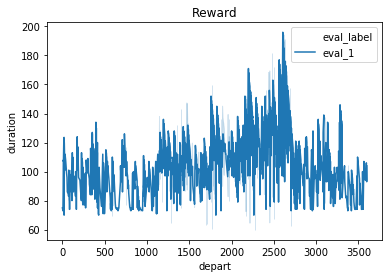

In [52]:
sns.lineplot(x = 'depart',    
             y = 'duration', 
             ci = 'sd', 
             hue = 'eval_label', 
             data = data[data["eval_label"] == "eval_1"],    legend = 'full').set_title("Reward");

In [5]:
res = {}
with open('./logs/Simple_Balanced_Negative_Reward/GS_results.json') as file:
    data = json.load(file)
    for run in data['results']:
        run_no = run["run"]
        res[f"{run_no}"] = [run["eval_mean_delay"], np.mean(run["eval_delay"]["episode_mean_delays_fixed"])]
        
res

{'7': [114.40562644971746, 127.83110766222171],
 '5': [100.85036202735317, 125.4137710310149],
 '3': [97.17223201002473, 133.63287232435806],
 '1': [111.50506902911563, 125.33017146268469],
 '8': [183.5087053129662, 126.87817405453018],
 '2': [285.1189825236969, 135.4103049075573],
 '4': [358.68338956144817, 129.3072330662541],
 '6': [307.8575253254659, 132.75914616771894],
 '9': [95.13617230615986, 126.05528590226095],
 '11': [97.51487404263534, 125.48718831414779],
 '10': [357.8092273855658, 127.10231879568971],
 '12': [416.7770184249026, 127.00048535536276]}